In [5]:
import pandas as pd

data = pd.read_csv("data/internship.csv")
data.head()

,internship_title,company_name,location,start_date,duration,stipend
0,Java Development,SunbaseData,Work From Home,Immediately,6 Months,"₹ 30,000 /month"
1,Accounting and Finance,DAKSM & Co. LLP,Noida,Immediately,6 Months,"₹ 5,000-10,000 /month"
2,Sales & Digital Marketing,Bharat Natural Elements Private Limited,Bangalore,Immediately,6 Months,"₹ 5,000 /month"
3,Social Entrepreneurship,Hamari Pahchan NGO,Work From Home,Immediately,6 Months,Unpaid
4,Videography & Photography,Esquare Lifestyle,Bangalore,Immediately,6 Months,"₹ 12,000 /month"


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   internship_title  6485 non-null   object 
 1   company_name      6485 non-null   object 
 2   location          6485 non-null   object 
 3   start_date        6485 non-null   object 
 4   duration          6445 non-null   float64
 5   stipend           6485 non-null   object 
 6   Other Benifits    736 non-null    object 
 7   min stipend       6456 non-null   float64
 8   max stipend       6456 non-null   float64
dtypes: float64(3), object(6)
memory usage: 456.1+ KB


## Data Cleanning and Feature Extraction

#### Data Cleanning and Feature Extraction on Stipend Column

1. **Replace 'Unpaid' with 0 in the stipend column:**
   - Replaces instances of 'Unpaid' in the "stipend" column with '0' to represent unpaid internships.

2. **Remove unwanted substrings and symbols:**
   - Removes "/month", "lump sum", and '₹' symbols from the "stipend" column for consistency and clarity.

3. **Extract other benefits and split stipend into min and max columns:**
   - Creates a new "Other Benefits" column by extracting the last part after '+' in the "stipend" column.
   - Splits the "stipend" column and keeps the first part, preparing for the extraction of minimum and maximum stipend values.

4. **Extract numeric values and handle commas:**
   - Extracts numeric values from the "stipend" column for minimum and maximum stipends.
   - Handles commas in the extracted numeric values to ensure correct numerical representation.

5. **Convert numeric columns to numeric type:**
   - Converts the 'min stipend' and 'max stipend' columns to numeric types, facilitating numerical operations and analysis.

In [6]:
# Replace 'Unpaid' with 0 in the stipend column
data['stipend'] = data['stipend'].apply(lambda x: '0' if 'Unpaid' in str(x) else x)

# Remove unwanted substrings and symbols
data['stipend'] = data['stipend'].str.replace("/month", "").str.replace("lump sum", "").str.replace("₹", "")

# Extract other benefits and split stipend into min and max columns
data['Other Benifits'] = data['stipend'].str.split('+').apply(lambda x: x[-1].strip() if len(x) > 1 else None)
data['stipend'] = data['stipend'].str.split('+').str[0].str.strip()

# Extract numeric values and handle commas
data['min stipend'] = data['stipend'].str.split("-").str[0].str.extract('([\d,]+)', expand=False).str.replace(",", "")
data['max stipend'] = data['stipend'].str.split("-").str[-1].str.extract('([\d,]+)', expand=False).str.replace(",", "")

# Convert numeric columns to numeric type
numeric_columns = ['min stipend', 'max stipend']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

#### Data Cleanning and Feature Extraction on duration Column

The code takes a 'duration' column containing values in weeks, converts them to months, removes unnecessary substrings, and then converts the entire 'duration' column to numeric type. This preprocessing may be useful for standardizing the representation of durations in the dataset, allowing for easier analysis and computation.

In [8]:
def weeks_to_months(duration):
    if 'Weeks' in duration:
        weeks = int(duration.split()[0])
        months = weeks / 4.33  # Average weeks in a month
        return f"{months:.2f} Months"
    else:
        return duration

data['duration'] = data['duration'].apply(weeks_to_months)
data['duration'] = data['duration'].str.replace(" Months", "").str.replace(" Month", "")
data["duration"] = data["duration"].apply(pd.to_numeric, errors='coerce')

In [79]:
data.sample(5)

,internship_title,company_name,location,start_date,duration,stipend,Other Benifits,min stipend,max stipend
817,Marketing,Zedex Info Private Limited,Mumbai,Immediately,5.0,"10,000",None,10000.0,10000.0
3420,Graphic Design,Sudarrshan Tech Services,Bangalore,Immediately,3.0,"5,000-15,000",None,5000.0,15000.0
1139,Marketing,Shyam’s Salon & Academy,Mira Bhayandar,Immediately,2.0,"10,000-12,000",None,10000.0,12000.0
5602,Graphic Design,Spatio Zest Private Limited,Work From Home,Immediately,6.0,"4,000",Incentives,4000.0,4000.0
2047,Project Management,Narayana Group,Hyderabad,Immediately,3.0,"15,000",None,15000.0,15000.0


## Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

####  Internship Duration Distribution

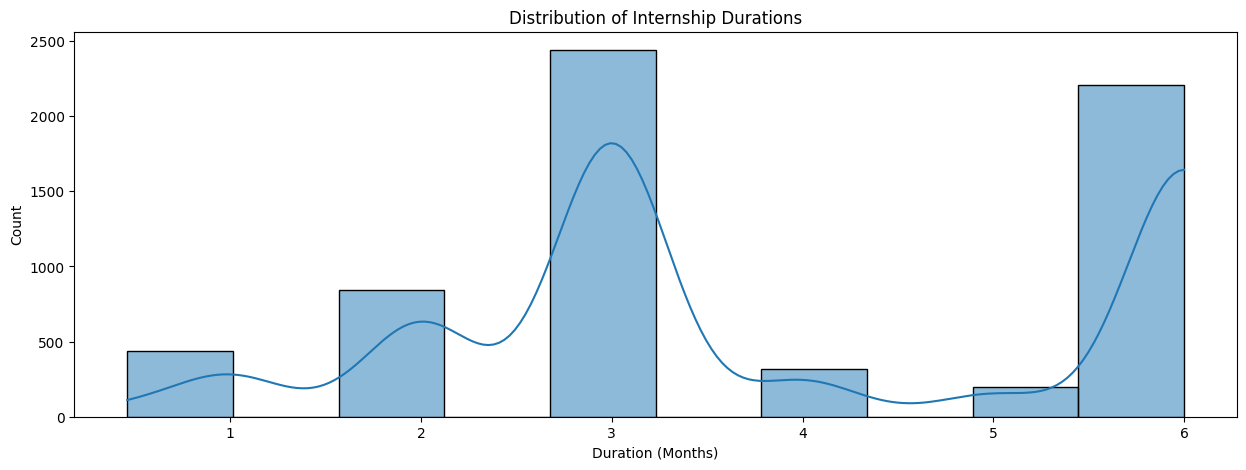

In [25]:
plt.figure(figsize=(15, 5))
sns.histplot(data['duration'], bins=10, kde=True)
plt.title('Distribution of Internship Durations')
plt.xlabel('Duration (Months)')
plt.ylabel('Count')
plt.show()

#### Top Internship Titles

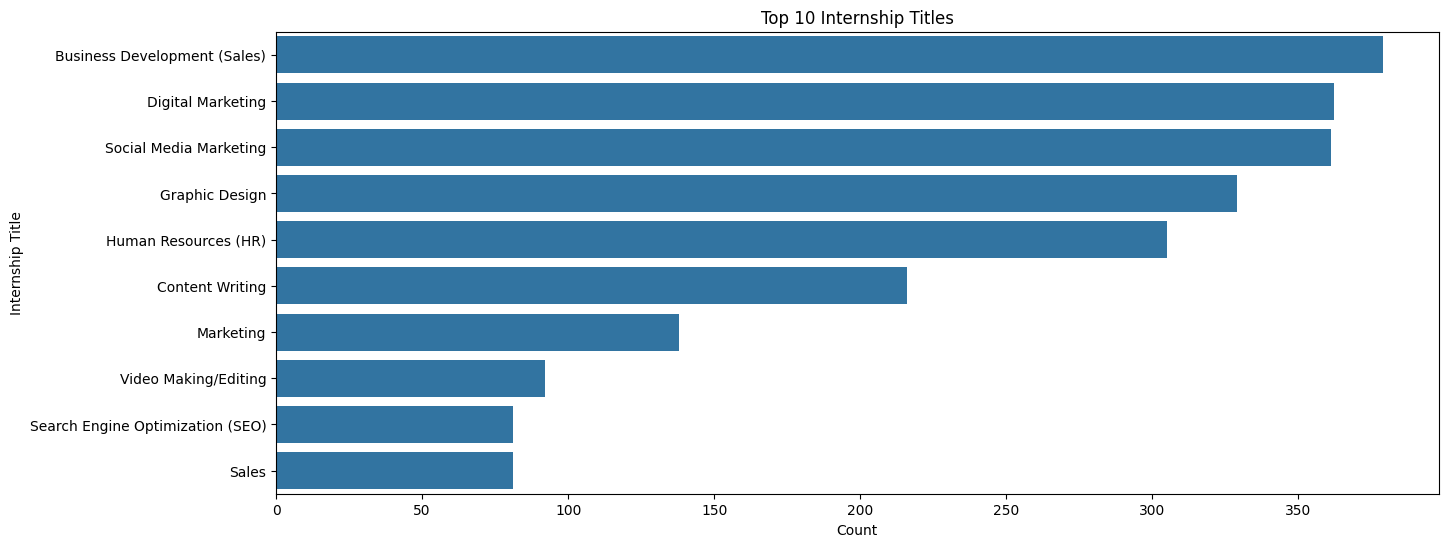

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(y='internship_title', data=data, order=data['internship_title'].value_counts().index[:10])
plt.title('Top 10 Internship Titles')
plt.xlabel('Count')
plt.ylabel('Internship Title')
plt.show()

#### Stipend Analysis

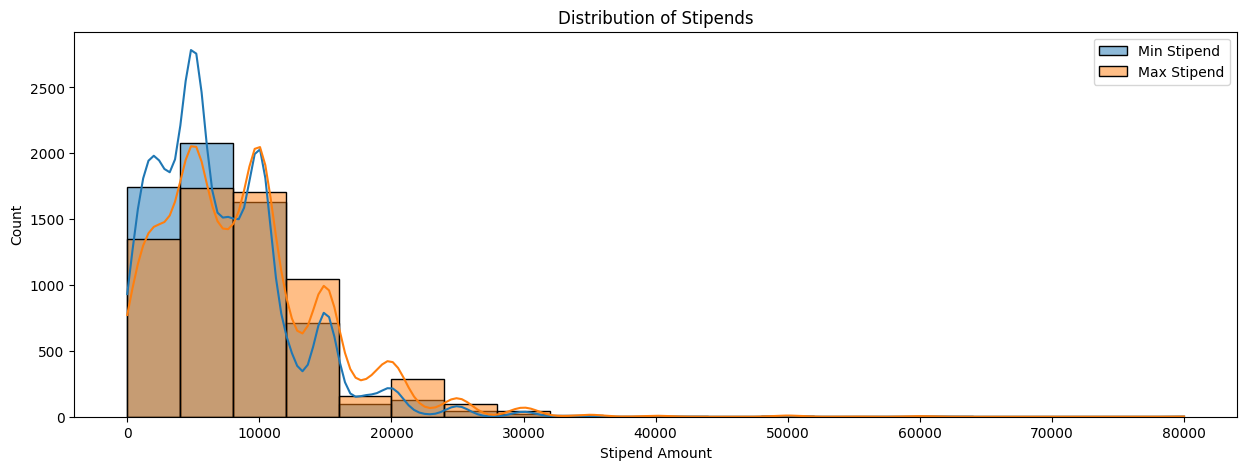

In [28]:
plt.figure(figsize=(15, 5))
sns.histplot(data['min stipend'], bins=20, kde=True, label='Min Stipend')
sns.histplot(data['max stipend'], bins=20, kde=True, label='Max Stipend')
plt.title('Distribution of Stipends')
plt.xlabel('Stipend Amount')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Company Distribution

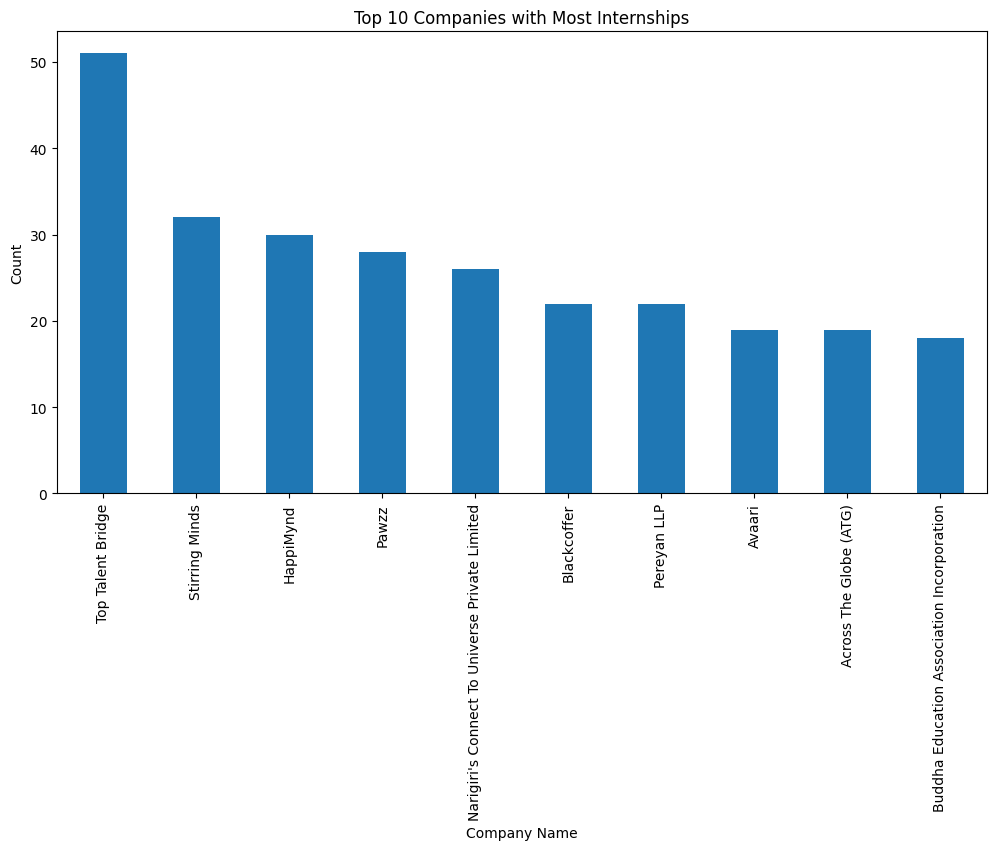

In [36]:
plt.figure(figsize=(12, 6))
data['company_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Companies with Most Internships')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.show()

#### Other Benefits Analysis

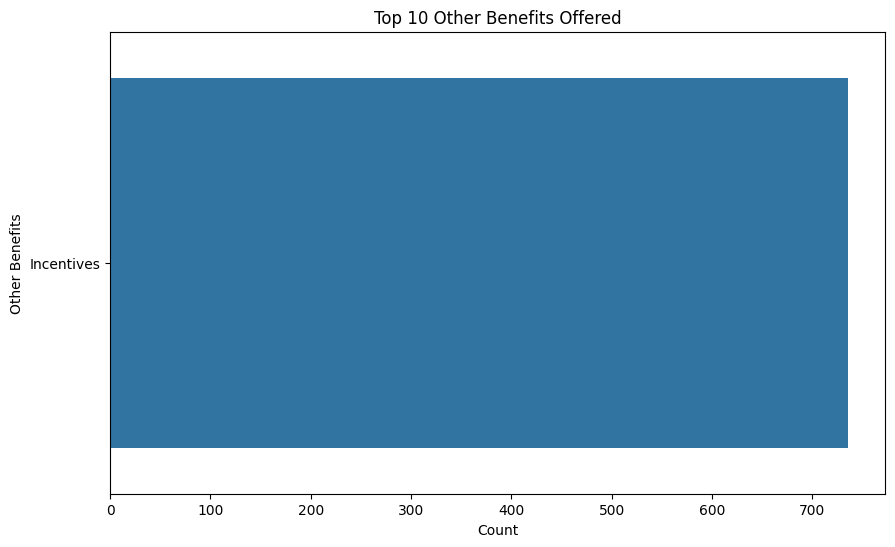

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Other Benifits', data=data, order=data['Other Benifits'].value_counts().index[:10])
plt.title('Top 10 Other Benefits Offered')
plt.xlabel('Count')
plt.ylabel('Other Benefits')
plt.show()

#### Stipend Range Analysis

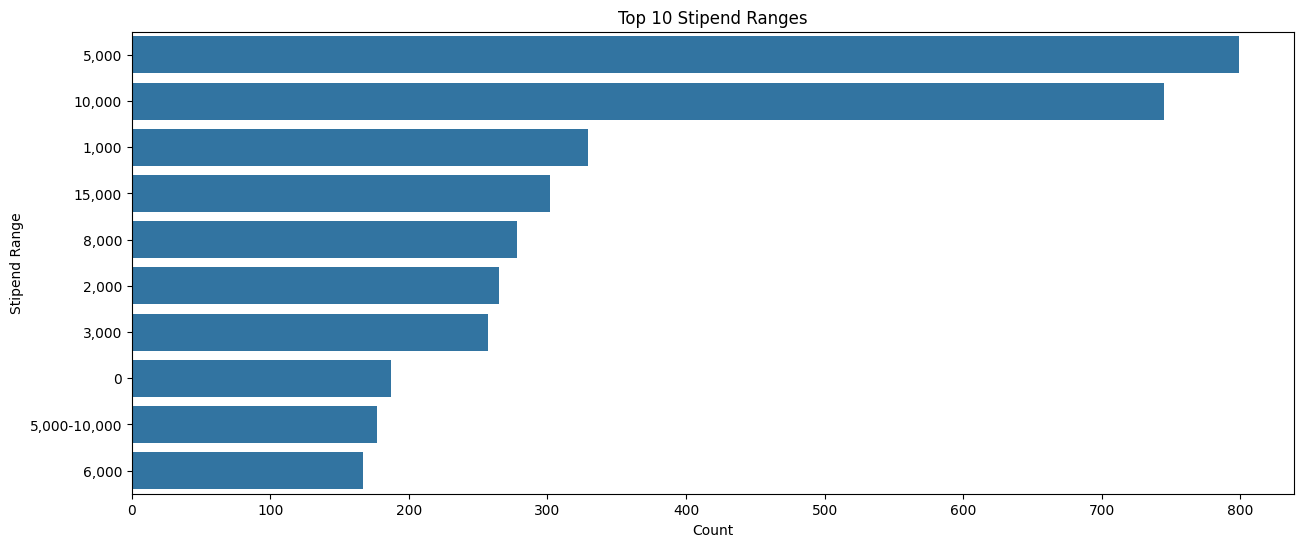

In [39]:
plt.figure(figsize=(15, 6))
sns.countplot(y='stipend', data=data, order=data['stipend'].value_counts().index[:10])
plt.title('Top 10 Stipend Ranges')
plt.xlabel('Count')
plt.ylabel('Stipend Range')
plt.show()

#### Stipend Distribution by Location (Top 25 Locations)

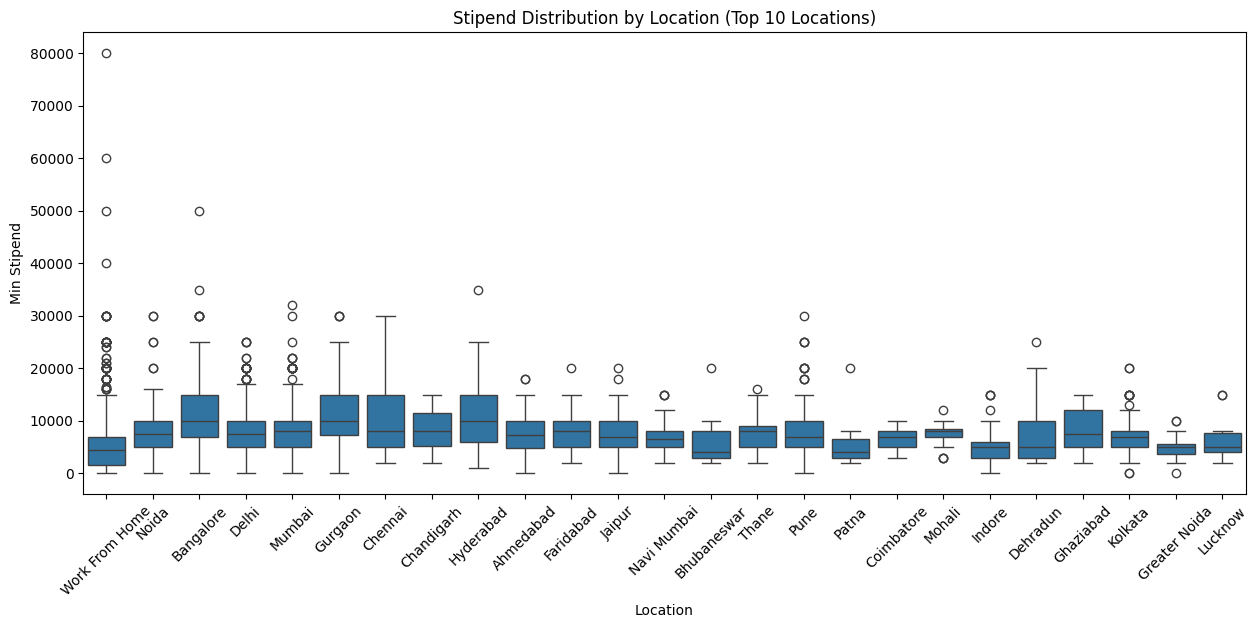

In [56]:
top_n_locations = 25  # Adjust as needed
top_locations = data['location'].value_counts().nlargest(top_n_locations).index

plt.figure(figsize=(15, 6))
sns.boxplot(x='location', y='min stipend', data=data[data['location'].isin(top_locations)])
plt.title('Stipend Distribution by Location (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Min Stipend')
plt.xticks(rotation=45)
plt.show()


#### Duration vs. Stipend Relationship

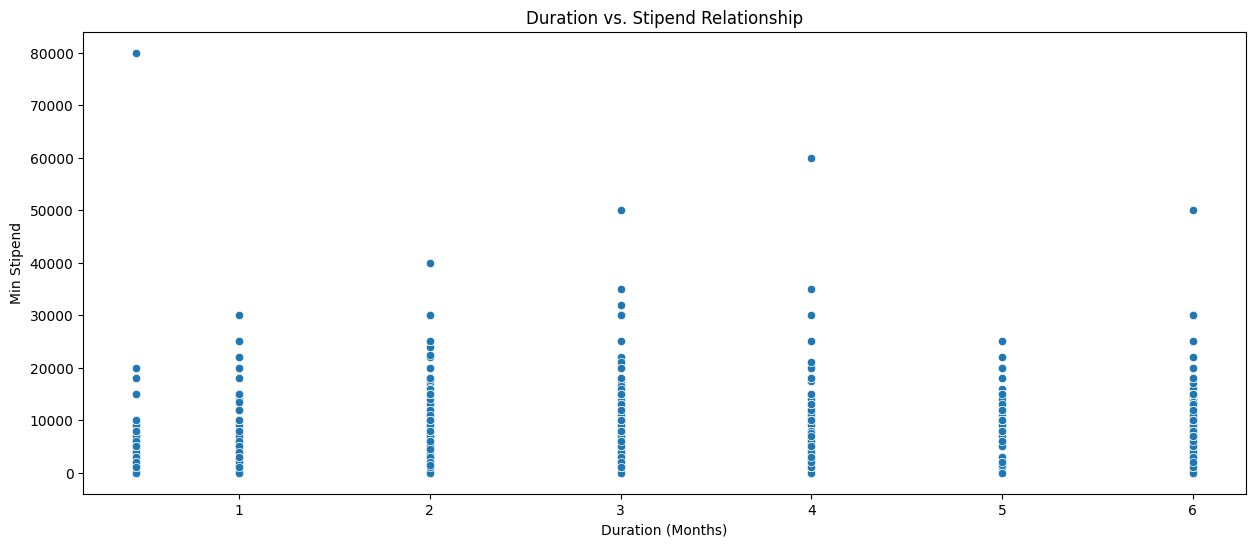

In [46]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='duration', y='min stipend', data=data)
plt.title('Duration vs. Stipend Relationship')
plt.xlabel('Duration (Months)')
plt.ylabel('Min Stipend')
plt.show()


#### Stipend Distribution by Company (Top 25 Companies)

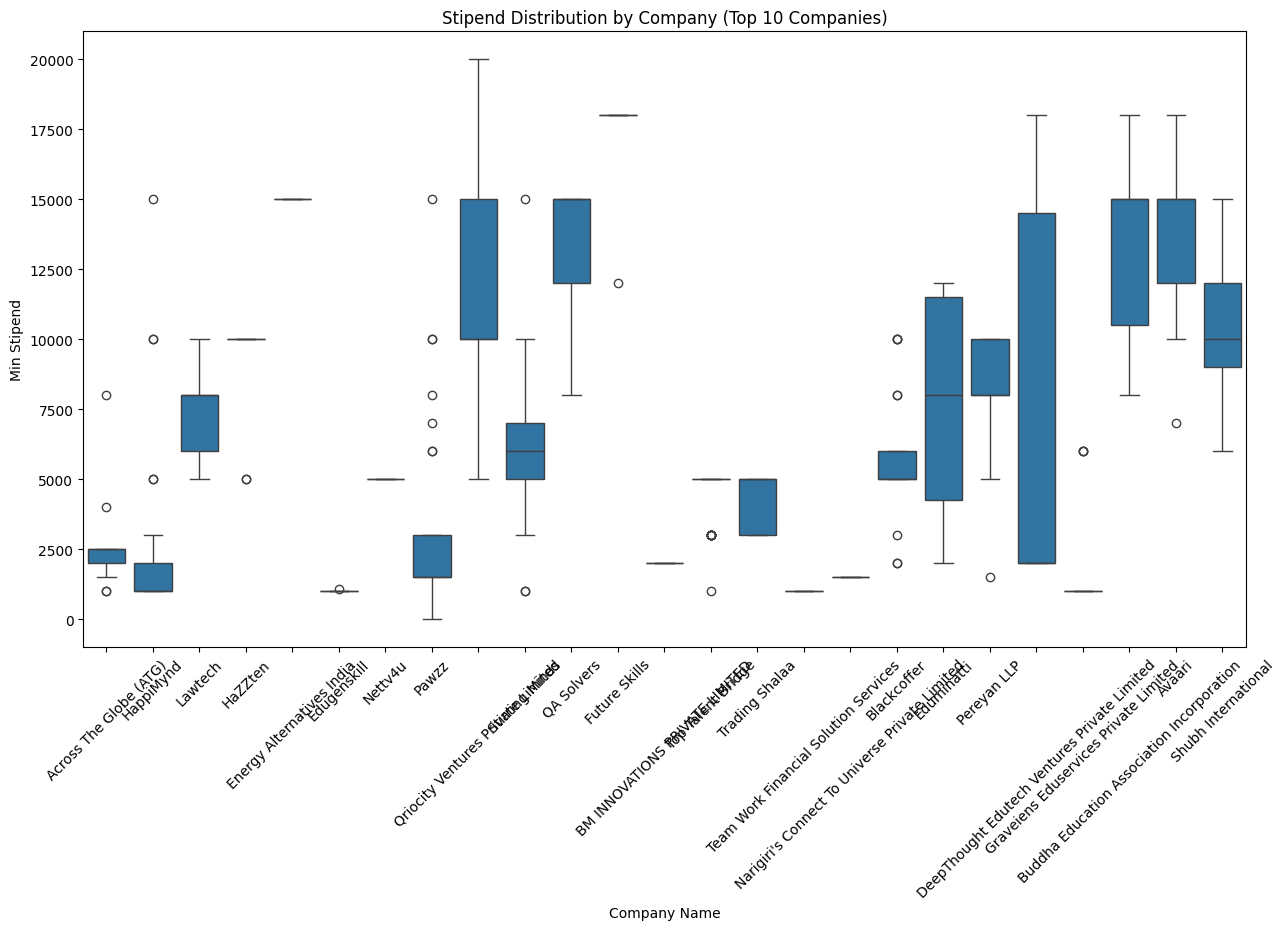

In [76]:
top_n_companies = 25  # Adjust as needed
top_companies = data['company_name'].value_counts().nlargest(top_n_companies).index

plt.figure(figsize=(15, 8))
sns.boxplot(x='company_name', y='min stipend', data=data[data['company_name'].isin(top_companies)])
plt.title('Stipend Distribution by Company (Top 10 Companies)')
plt.xlabel('Company Name')
plt.ylabel('Min Stipend')
plt.xticks(rotation=45)
plt.show()



#### Duration Distribution by Company (Top 25 Countries)

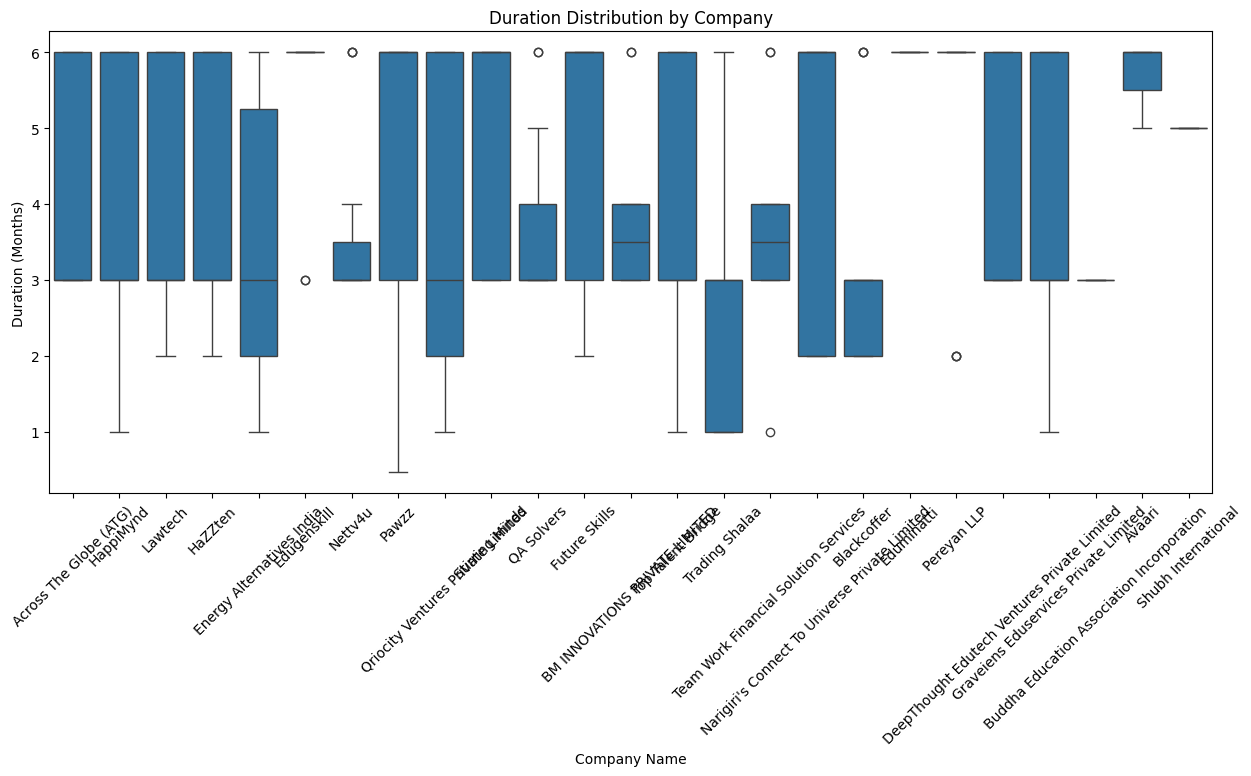

In [61]:
top_n_companies = 25  # Adjust as needed
top_companies = data['company_name'].value_counts().nlargest(top_n_companies).index

plt.figure(figsize=(15, 6))
sns.boxplot(x='company_name', y='duration', data=data[data['company_name'].isin(top_companies)])
plt.title('Duration Distribution by Company')
plt.xlabel('Company Name')
plt.ylabel('Duration (Months)')
plt.xticks(rotation=45)
plt.show()

#### Correlation Heatmap

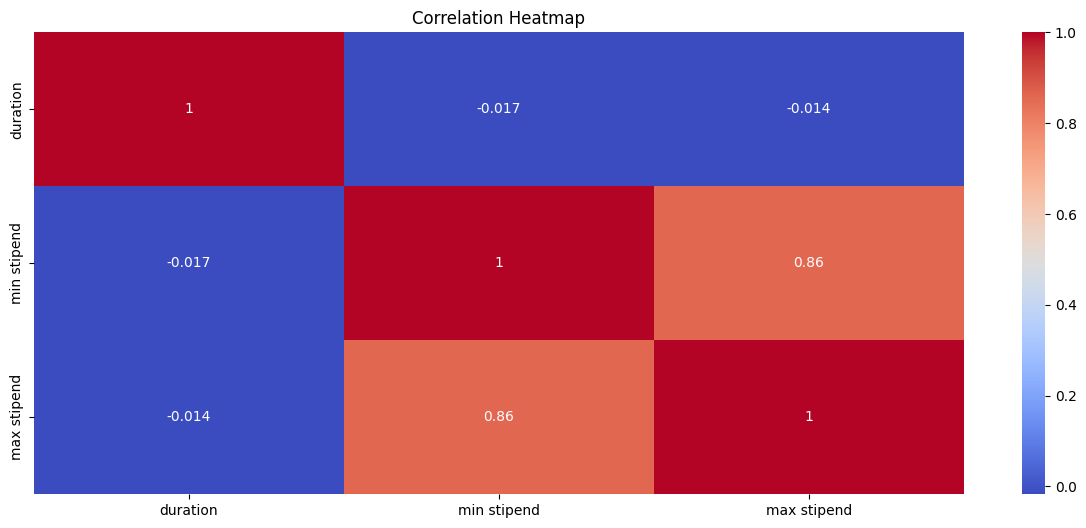

In [48]:
correlation_matrix = data[['duration', 'min stipend', 'max stipend']].corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Analysis Summary Report

### 1. Internship Duration Distribution
- The distribution of internship durations indicates that the majority of internships last around 3 months, with a slight peak at 6 months.

### 2. Top 10 Internship Titles
- The top 10 internship titles include roles such as Digital Marketing Content Creation, Sales, Accounting & Tally, Project Management, Graphic Design, Lead Generation, Campus Ambassador, Office Executive/Merchandising, and Apparel Design.

### 3. Stipend Analysis
- The distribution of stipends shows that most internships have a minimum stipend around ₹1,000 to ₹10,000. Some internships have higher stipend ranges, with the maximum stipend going up to ₹30,000, and some are also unpaid.

### 4. Top 10 Companies with Most Internships
- The top 10 companies offering the most internships include:
  - Top Talent Bridge
  - Stirring Minds
  - HappiMynd
  - Pawzz
  - Narigiri's Connect To Universe Private Limited
  - Blackcoffer
  - Pereyan LLP
  - Avaari
  - Across The Globe (ATG)
  - Buddha Education Association Incorporation

### 5. Top 10 Other Benefits Offered
- The top 10 other benefits include options such as "Incentives," "Performance-Based," and some unspecified benefits.

### 6. Top 10 Stipend Ranges
- The top 10 stipend ranges show the most common stipend amounts offered by companies, starting from Unpaid to ₹15,000, with ₹5,000 being the most common.

### 7. Stipend Distribution by Location (Top 25 Locations)
- The boxplot illustrates the distribution of minimum stipends across the top 25 locations with the most internships. The locations include:
  - Top Talent Bridge
  - Stirring Minds
  - HappiMynd
  - Pawzz
  - Narigiri's Connect To Universe Private Limited
  - Blackcoffer
  - Pereyan LLP
  - Avaari
  - Across The Globe (ATG)
  - Buddha Education Association Incorporation
  - Eduminatti
  - QA Solvers
  - Shubh International
  - Qriocity Ventures Private Limited
  - Edugenskill
  - HaZZten
  - Trading Shalaa
  - Energy Alternatives India
  - Graveiens Eduservices Private Limited
  - Lawtech
  - Nettv4u
  - Team Work Financial Solution Services
  - BM INNOVATIONS PRIVATE LIMITED
  - DeepThought Edutech Ventures Private Limited
  - Future Skills

### 8. Duration vs. Stipend Relationship
- The scatter plot shows the relationship between internship duration and minimum stipend. There doesn't seem to be a clear correlation between these two variables.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fhealthysenseofself.com%2Fwp-content%2Fuploads%2F2013%2F07%2FScreen-Shot-2015-12-22-at-3.37.07-PM.jpg&f=1&nofb=1&ipt=b7ccbb11a1fd5416af68ae93edb581e9bc85be5313413e1a7abc646277d910fd&ipo=images)